<a href="https://colab.research.google.com/github/hyj378/011/blob/ML_basic_inyt/ML_lab_07_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Training / Test  dataset 나눠서 사용하기

보통 8/2 의 비율로 나눈다

In [0]:
import tensorflow as tf
#placeholder를 통한 간단한 구현
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

#Training datasets를 출력해 보여드리겠습니다
import pandas as pd
import numpy as np
print("*****Training dataset*****")
npX = np.array(x_data)
npY = np.array(y_data)
df = {"x1":list(npX[:, [0]]), "x2":list(npX[:, [1]]), "x3":list(npX[:, [2]]), "y":list(npY)}
display(pd.DataFrame(df))

#test dataset을 출력해 보여드리겠습니다
print("\n*****test dataset*****")
nptestX = np.array(x_test)
nptestY = np.array(y_test)
tf = {"x1":list(nptestX[:, [0]]), "x2":list(nptestX[:, [1]]), "x3":list(nptestX[:, [2]]), "y":list(nptestY)}
display(pd.DataFrame(tf))

*****Training dataset*****


,x1,x2,x3,y
0,[1],[2],[1],"[0, 0, 1]"
1,[1],[3],[2],"[0, 0, 1]"
2,[1],[3],[4],"[0, 0, 1]"
3,[1],[5],[5],"[0, 1, 0]"
4,[1],[7],[5],"[0, 1, 0]"
5,[1],[2],[5],"[0, 1, 0]"
6,[1],[6],[6],"[1, 0, 0]"
7,[1],[7],[7],"[1, 0, 0]"



*****test dataset*****


,x1,x2,x3,y
0,[2],[1],[1],"[0, 0, 1]"
1,[3],[1],[2],"[0, 0, 1]"
2,[3],[3],[4],"[0, 0, 1]"


In [0]:
import tensorflow as tf
X=tf.placeholder("float", [None, 3])
Y=tf.placeholder("float", [None, 3])

W=tf.Variable(tf.random_normal([3, 3]))
b=tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis =1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) #학습과정W조정

#tf.argmax; Returns the index with the largest value across dimensions(차원) of a tensor.
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1)) #인덱스끼리 비교(같은가?)
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))


step: 0   cost: 2.6467037 
 [[-0.8404234   0.7234302  -0.57160723]
 [-0.27651513 -0.3885623  -0.45179945]
 [ 1.3955709   1.1563733   0.6054576 ]] 학습중

step: 20   cost: 1.088359 
 [[-1.0950617   0.5887572  -0.18229596]
 [-0.42381123 -0.5359478  -0.15711783]
 [ 1.1841066   1.1613743   0.81192064]] 학습중

step: 40   cost: 0.95807517 
 [[-1.2769982   0.4891558   0.09924205]
 [-0.3768006  -0.54244465 -0.19763175]
 [ 1.2068541   1.2103351   0.7402124 ]] 학습중

step: 60   cost: 0.86500067 
 [[-1.4344      0.40850297  0.33729652]
 [-0.34303814 -0.532216   -0.24162285]
 [ 1.2349745   1.2357264   0.68670094]] 학습중

step: 80   cost: 0.79753876 
 [[-1.572647    0.34509864  0.5389478 ]
 [-0.31696895 -0.5156733  -0.28423464]
 [ 1.2636625   1.2487109   0.64502805]] 학습중

step: 100   cost: 0.7472542 
 [[-1.6962461   0.2959482   0.7116973 ]
 [-0.29622486 -0.49812862 -0.3225233 ]
 [ 1.2921333   1.255312    0.60995644]] 학습중

step: 120   cost: 0.70853937 
 [[-1.8085992   0.2581668   0.86183184]
 [-0.27961695 -

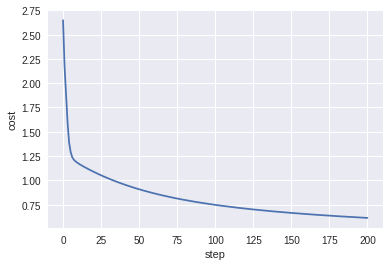


*****test dataset*****


,x1,x2,x3,y
0,[2],[1],[1],"[0, 0, 1]"
1,[3],[1],[2],"[0, 0, 1]"
2,[3],[3],[4],"[0, 0, 1]"


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
#세션 실행 및 결과 출력
cost_g=[]
step_g=[]
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(201):
    cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X:x_data, Y:y_data})
    cost_g.append(cost_val)
    step_g.append(step)
    if(step % 20 == 0):
      print("\nstep:", step, "  cost:", cost_val, "\n", W_val, "학습중")
  print("\n\n*****학습 완료(W최적화)*****\n\n")
  print("*****test시작*****\n")
  print("예측(prediction): ",sess.run(prediction, feed_dict={X: x_test}))
  print("정확도(Accuray): ",sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
  
  plt.figure
  plt.plot(step_g, cost_g)
  plt.xlabel('step')
  plt.ylabel('cost')
  #plt.grid() 눈금 선 지우기
  plt.show()
  
 #test dataset을 출력해 보여드리겠습니다
print("\n*****test dataset*****")
nptestX = np.array(x_test)
nptestY = np.array(y_test)
tf = {"x1":list(nptestX[:, [0]]), "x2":list(nptestX[:, [1]]), "x3":list(nptestX[:, [2]]), "y":list(nptestY)}
display(pd.DataFrame(tf))

## Learning rate 조정 : NaN!

Learning rate 너무 크면 그래프에서 나가버린다!

Learning rate 너무 작으면 Local minima에서 벗어나지 못한다!

<H6>자료는 위와 그대로 사용하겠습니다

[]

step: 0   cost: 8.633615 
 [[-1.5657604  -0.02153692  2.0484958 ]
 [-1.98599     3.2233095   1.0491915 ]
 [-1.6508893   4.2055573   2.9392133 ]] 학습중

step: 20   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 40   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 60   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 80   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 100   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 120   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 140   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 160   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 180   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중

step: 200   cost: nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 학습중


*****학습 완료(W최적화)*****


*****test시작*****

예측(prediction):  [0 0 0]
정확도(Accuray):  0.0


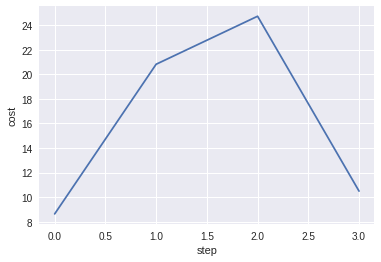

cost값이 학습할때마다 달라짐

*****test dataset*****


,x1,x2,x3,y
0,[2],[1],[1],"[0, 0, 1]"
1,[3],[1],[2],"[0, 0, 1]"
2,[3],[3],[4],"[0, 0, 1]"


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
#Jupyter 환경에서는 out section에 그래프를 출력하기 위해 %matplotlib inline이라는 명령을 사용합니다.
#코드는 위와 동일
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X=tf.placeholder("float", [None, 3])
Y=tf.placeholder("float", [None, 3])

W=tf.Variable(tf.random_normal([3, 3]))
b=tf.Variable(tf.random_normal([3]))

#학습률 변화 너무 큰 학습률
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis =1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost) #학습과정W조정


prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
#세션 실행 및 결과 출력
cost_g=[]
step_g=[]
w_g =[]
print(w_g)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(201):
    cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X:x_data, Y:y_data})
    cost_g.append(cost_val)
    step_g.append(step)
    w_g.append(W_val)
    if(step % 20 == 0):
      print("\nstep:", step, "  cost:", cost_val, "\n", W_val, "학습중")
  print("\n\n*****학습 완료(W최적화)*****\n\n")
  print("*****test시작*****\n")
  print("예측(prediction): ",sess.run(prediction, feed_dict={X: x_test}))
  print("정확도(Accuray): ",sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
  
  plt.figure
  plt.plot(step_g, cost_g)
  plt.xlabel('step')
  plt.ylabel('cost')
  #plt.grid() 눈금 선 지우기
  plt.show()
  print("cost값이 학습할때마다 달라짐")
  
 #test dataset을 출력해 보여드리겠습니다
print("\n*****test dataset*****")
nptestX = np.array(x_test)
nptestY = np.array(y_test)
tf = {"x1":list(nptestX[:, [0]]), "x2":list(nptestX[:, [1]]), "x3":list(nptestX[:, [2]]), "y":list(nptestY)}
display(pd.DataFrame(tf))


step: 0   cost: 6.658387 
 [[-0.4771282   0.59898084 -0.97416383]
 [-0.53770685 -0.35455814  0.09054563]
 [-0.53984165 -0.5511948   1.1331611 ]] 학습중

step: 20   cost: 6.658387 
 [[-0.4771282   0.59898084 -0.97416383]
 [-0.53770685 -0.35455814  0.09054563]
 [-0.53984165 -0.5511948   1.1331611 ]] 학습중

step: 40   cost: 6.658387 
 [[-0.4771282   0.59898084 -0.97416383]
 [-0.53770685 -0.35455814  0.09054563]
 [-0.53984165 -0.5511948   1.1331611 ]] 학습중

step: 60   cost: 6.658387 
 [[-0.4771282   0.59898084 -0.97416383]
 [-0.53770685 -0.35455814  0.09054563]
 [-0.53984165 -0.5511948   1.1331611 ]] 학습중

step: 80   cost: 6.658387 
 [[-0.4771282   0.59898084 -0.97416383]
 [-0.53770685 -0.35455814  0.09054563]
 [-0.53984165 -0.5511948   1.1331611 ]] 학습중

step: 100   cost: 6.658387 
 [[-0.4771282   0.59898084 -0.97416383]
 [-0.53770685 -0.35455814  0.09054563]
 [-0.53984165 -0.5511948   1.1331611 ]] 학습중

step: 120   cost: 6.658387 
 [[-0.4771282   0.59898084 -0.97416383]
 [-0.53770685 -0.35455814

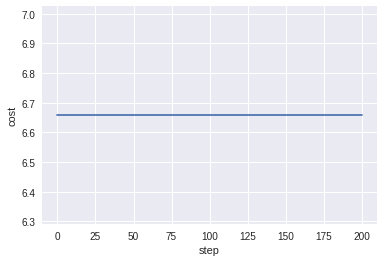


*****test dataset*****


,x1,x2,x3,y
0,[2],[1],[1],"[0, 0, 1]"
1,[3],[1],[2],"[0, 0, 1]"
2,[3],[3],[4],"[0, 0, 1]"


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
#위와 동일
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X=tf.placeholder("float", [None, 3])
Y=tf.placeholder("float", [None, 3])

W=tf.Variable(tf.random_normal([3, 3]))
b=tf.Variable(tf.random_normal([3]))

#학습률 변화 너무 작은 학습률
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis =1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost) #학습과정W조정

prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))

#세션 실행 및 결과 출력
cost_g=[]
step_g=[]
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(201):
    cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X:x_data, Y:y_data})
    cost_g.append(cost_val)
    step_g.append(step)
    if(step % 20 == 0):
      print("\nstep:", step, "  cost:", cost_val, "\n", W_val, "학습중")
  print("\n\n*****학습 완료(W최적화)*****\n\n")
  print("*****test시작*****\n")
  print("예측(prediction): ",sess.run(prediction, feed_dict={X: x_test}))
  print("정확도(Accuray): ",sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
  
  plt.figure
  plt.plot(step_g, cost_g)
  plt.xlabel('step')
  plt.ylabel('cost')
  #plt.grid() 눈금 선 지우기
  plt.show()
  print("cost값이 거의 줄어들지 않는다->local minima")
  
 #test dataset을 출력해 보여드리겠습니다
print("\n*****test dataset*****")
nptestX = np.array(x_test)
nptestY = np.array(y_test)
tf = {"x1":list(nptestX[:, [0]]), "x2":list(nptestX[:, [1]]), "x3":list(nptestX[:, [2]]), "y":list(nptestY)}
display(pd.DataFrame(tf))

### 적절한 학습률이 중요하다!

## normailzation

multiple linear regression알고리즘으로 설명

In [150]:
import tensorflow as tf
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
#데이터 슬라이싱, numpy이용
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32,shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

step_g=[]
cost_g=[]
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],feed_dict={X:x_data, Y:y_data})

  if step % 200 == 0:
    print(step, "Cost: ",cost_val, "\nPredicion:\n",hy_val)

0 Cost:  4469482000.0 
Predicion:
 [[46942.176]
 [96986.49 ]
 [75788.39 ]
 [52417.277]
 [62196.25 ]
 [62744.64 ]
 [57326.758]
 [73650.04 ]]
200 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
400 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
600 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
800 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1000 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1200 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1400 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1600 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1800 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
2000 Cost:  nan 
Predicion:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [168]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

#normalization 처리 전
import pandas as pd
import numpy as np
print("*****before normalization*****")
npX = np.array(xy[:,0:-1])
npY = np.array(xy[:,[-1]])
df = {"x1":list(npX[:, [0]]), "x2":list(npX[:, [1]]), "x3":list(npX[:, [2]]),"x4":list(npX[:, [3]]), "y":list(npY)}
display(pd.DataFrame(df))

scaler = MinMaxScaler(feature_range=(0,1))
xy = scaler.fit_transform(xy)

#normalization 처리 후
print("*****after normalization*****")
npX = np.array(xy[:,0:-1])
npY = np.array(xy[:,[-1]])
df = {"x1":list(npX[:, [0]]), "x2":list(npX[:, [1]]), "x3":list(npX[:, [2]]),"x4":list(npX[:, [3]]), "y":list(npY)}
display(pd.DataFrame(df))



*****before normalization*****


,x1,x2,x3,x4,y
0,[828.659973],[833.450012],[908100.0],[828.349976],[831.659973]
1,[823.02002],[828.070007],[1828100.0],[821.655029],[828.070007]
2,[819.929993],[824.400024],[1438100.0],[818.97998],[824.159973]
3,[816.0],[820.958984],[1008100.0],[815.48999],[819.23999]
4,[819.359985],[823.0],[1188100.0],[818.469971],[818.97998]
5,[819.0],[823.0],[1198100.0],[816.0],[820.450012]
6,[811.700012],[815.25],[1098100.0],[809.780029],[813.669983]
7,[809.51001],[816.659973],[1398100.0],[804.539978],[809.559998]


*****after normalization*****


,x1,x2,x3,x4,y
0,[1.0],[1.0],[0.0],[1.0],[1.0]
1,[0.7054849139917465],[0.7043955245743803],[0.9999999999999999],[0.7188178260241784],[0.8375579157894961]
2,[0.5441254899552561],[0.5027482399462144],[0.5760869565217391],[0.6064680055832028],[0.6606331002636878]
3,[0.3389035268632128],[0.3136802327383066],[0.10869565217391297],[0.4598913448039781],[0.4380091832683064]
4,[0.5143600016355165],[0.42582389506117124],[0.30434782608695643],[0.5850480541829555],[0.42624401158824554]
5,[0.4955617929914595],[0.42582389506117124],[0.3152173913043478],[0.48131133820339045],[0.49276137190200586]
6,[0.11436063871246915],[0.0],[0.2065217391304347],[0.22007775893135317],[0.185972382321701]
7,[0.0],[0.0774709928762718],[0.532608695652174],[0.0],[0.0]


In [163]:
#데이터 슬라이싱, numpy이용
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32,shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

step_g=[]
cost_g=[]
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train],feed_dict={X:x_data, Y:y_data})

  if step % 200 == 0:
    print(step, "Cost: ",cost_val, "\nPredicion:\n",hy_val)

0 Cost:  11.273638 
Predicion:
 [[-4.180318 ]
 [-3.2566543]
 [-2.8761268]
 [-2.407294 ]
 [-2.810399 ]
 [-2.6860704]
 [-1.7160113]
 [-1.3371774]]
200 Cost:  11.104774 
Predicion:
 [[-4.146089 ]
 [-3.2239513]
 [-2.848821 ]
 [-2.3860846]
 [-2.7852817]
 [-2.661833 ]
 [-1.6999125]
 [-1.3215184]]
400 Cost:  10.938469 
Predicion:
 [[-4.112117 ]
 [-3.1914973]
 [-2.821723 ]
 [-2.3650365]
 [-2.760355 ]
 [-2.6377802]
 [-1.683938 ]
 [-1.3059819]]
600 Cost:  10.774683 
Predicion:
 [[-4.0783997]
 [-3.1592913]
 [-2.7948318]
 [-2.344149 ]
 [-2.7356176]
 [-2.6139104]
 [-1.6680868]
 [-1.2905667]]
800 Cost:  10.61338 
Predicion:
 [[-4.0449357]
 [-3.127331 ]
 [-2.768146 ]
 [-2.323421 ]
 [-2.711069 ]
 [-2.5902228]
 [-1.6523584]
 [-1.2752721]]
1000 Cost:  10.45453 
Predicion:
 [[-4.011725 ]
 [-3.0956159]
 [-2.7416646]
 [-2.3028514]
 [-2.6867085]
 [-2.5667167]
 [-1.6367519]
 [-1.2600973]]
1200 Cost:  10.298086 
Predicion:
 [[-3.9787633]
 [-3.0641432]
 [-2.7153854]
 [-2.2824388]
 [-2.662533 ]
 [-2.5433898]
 [